In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Importing the dataset
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# finding unique values in dataset columns
for i in df.columns:
    print(i, df[i].unique())

symboling [ 3  1  2  0 -1 -2]
normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.

In [4]:
# Data Cleaning
# finding missing values in dataset
for col in df.columns:
    for i in df.index:
        if df.loc[i, col] == '?':
            print(col)

normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
normalized-losses
num-of-doors
num-of-doors
bore
bore
bore
bore
stroke
stroke
stroke
stroke
horsepower
horsepower
peak-rpm
peak-rpm
price
price
price
price


In [5]:
# fixing ? in normalized _ losses, no of doors, bore, stroke, horsepower, peak rpm, price

col_for_change = ['normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm','price']

for col in col_for_change:
    for i in df.index:
        if df.loc[i, col] == '?':
            df[col] = df[col].replace('?', np.nan)

for col in col_for_change:
    if col == 'num-of-doors':
        m = df[col].mode()
        df[col].fillna(m[0],inplace=True)
    else:
        df[col] = df[col].astype(float)
        m = df[col].median()
        df[col].fillna(m,inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6972\1401489411.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(m,inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6972\1401489411.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [6]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
original_df = df
original_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [9]:
# coverting into numerical
for col in df.columns:
    if df[col].dtypes == object:
        df[f'{col}_encoded']=df[col].astype('category').cat.codes


In [10]:
# removing non numericals
for col in df.columns:
    if df[col].dtypes == object:
        df.drop(col, axis=1,inplace=True)
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make_encoded,fuel-type_encoded,aspiration_encoded,num-of-doors_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,engine-type_encoded,num-of-cylinders_encoded,fuel-system_encoded
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,1,2,2,0,5,3,5
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,1,0,0,3,1,0,3,2,5
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,21,1,0,0,3,2,0,3,2,5
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,21,1,1,0,3,2,0,3,2,5
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,21,1,0,0,3,2,0,5,3,5
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,21,0,1,0,3,2,0,3,3,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symboling                 205 non-null    int64  
 1   normalized-losses         205 non-null    float64
 2   wheel-base                205 non-null    float64
 3   length                    205 non-null    float64
 4   width                     205 non-null    float64
 5   height                    205 non-null    float64
 6   curb-weight               205 non-null    int64  
 7   engine-size               205 non-null    int64  
 8   bore                      205 non-null    float64
 9   stroke                    205 non-null    float64
 10  compression-ratio         205 non-null    float64
 11  horsepower                205 non-null    float64
 12  peak-rpm                  205 non-null    float64
 13  city-mpg                  205 non-null    int64  
 14  highway-mp

In [12]:
# Finding correlation between the features
c = []
cor = []
for i in range(0,25):
    corr=df[df.columns[i]].corr(df['price'])
    c.append(df.columns[i])
    cor.append(corr)
print(c)
print(cor)

['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'make_encoded', 'fuel-type_encoded', 'aspiration_encoded', 'num-of-doors_encoded', 'body-style_encoded', 'drive-wheels_encoded', 'engine-location_encoded', 'engine-type_encoded', 'num-of-cylinders_encoded']
[-0.08014885764286693, 0.09548893712250732, 0.5848468389722247, 0.6865674442855655, 0.7245583242779031, 0.14043881851427562, 0.8198166839956318, 0.8603427324326135, 0.5328613101427542, 0.08362710782152111, 0.07289043869078722, 0.7499191229023537, -0.10728291460646903, -0.668821519228441, -0.6930373012364792, 1.0, -0.15525893567441895, -0.11243901663473056, 0.1757449572806098, -0.046496922188222975, -0.07161439477304878, 0.5803670957695236, 0.33145901162722197, 0.07497730958502818, 0.013273002932070198]


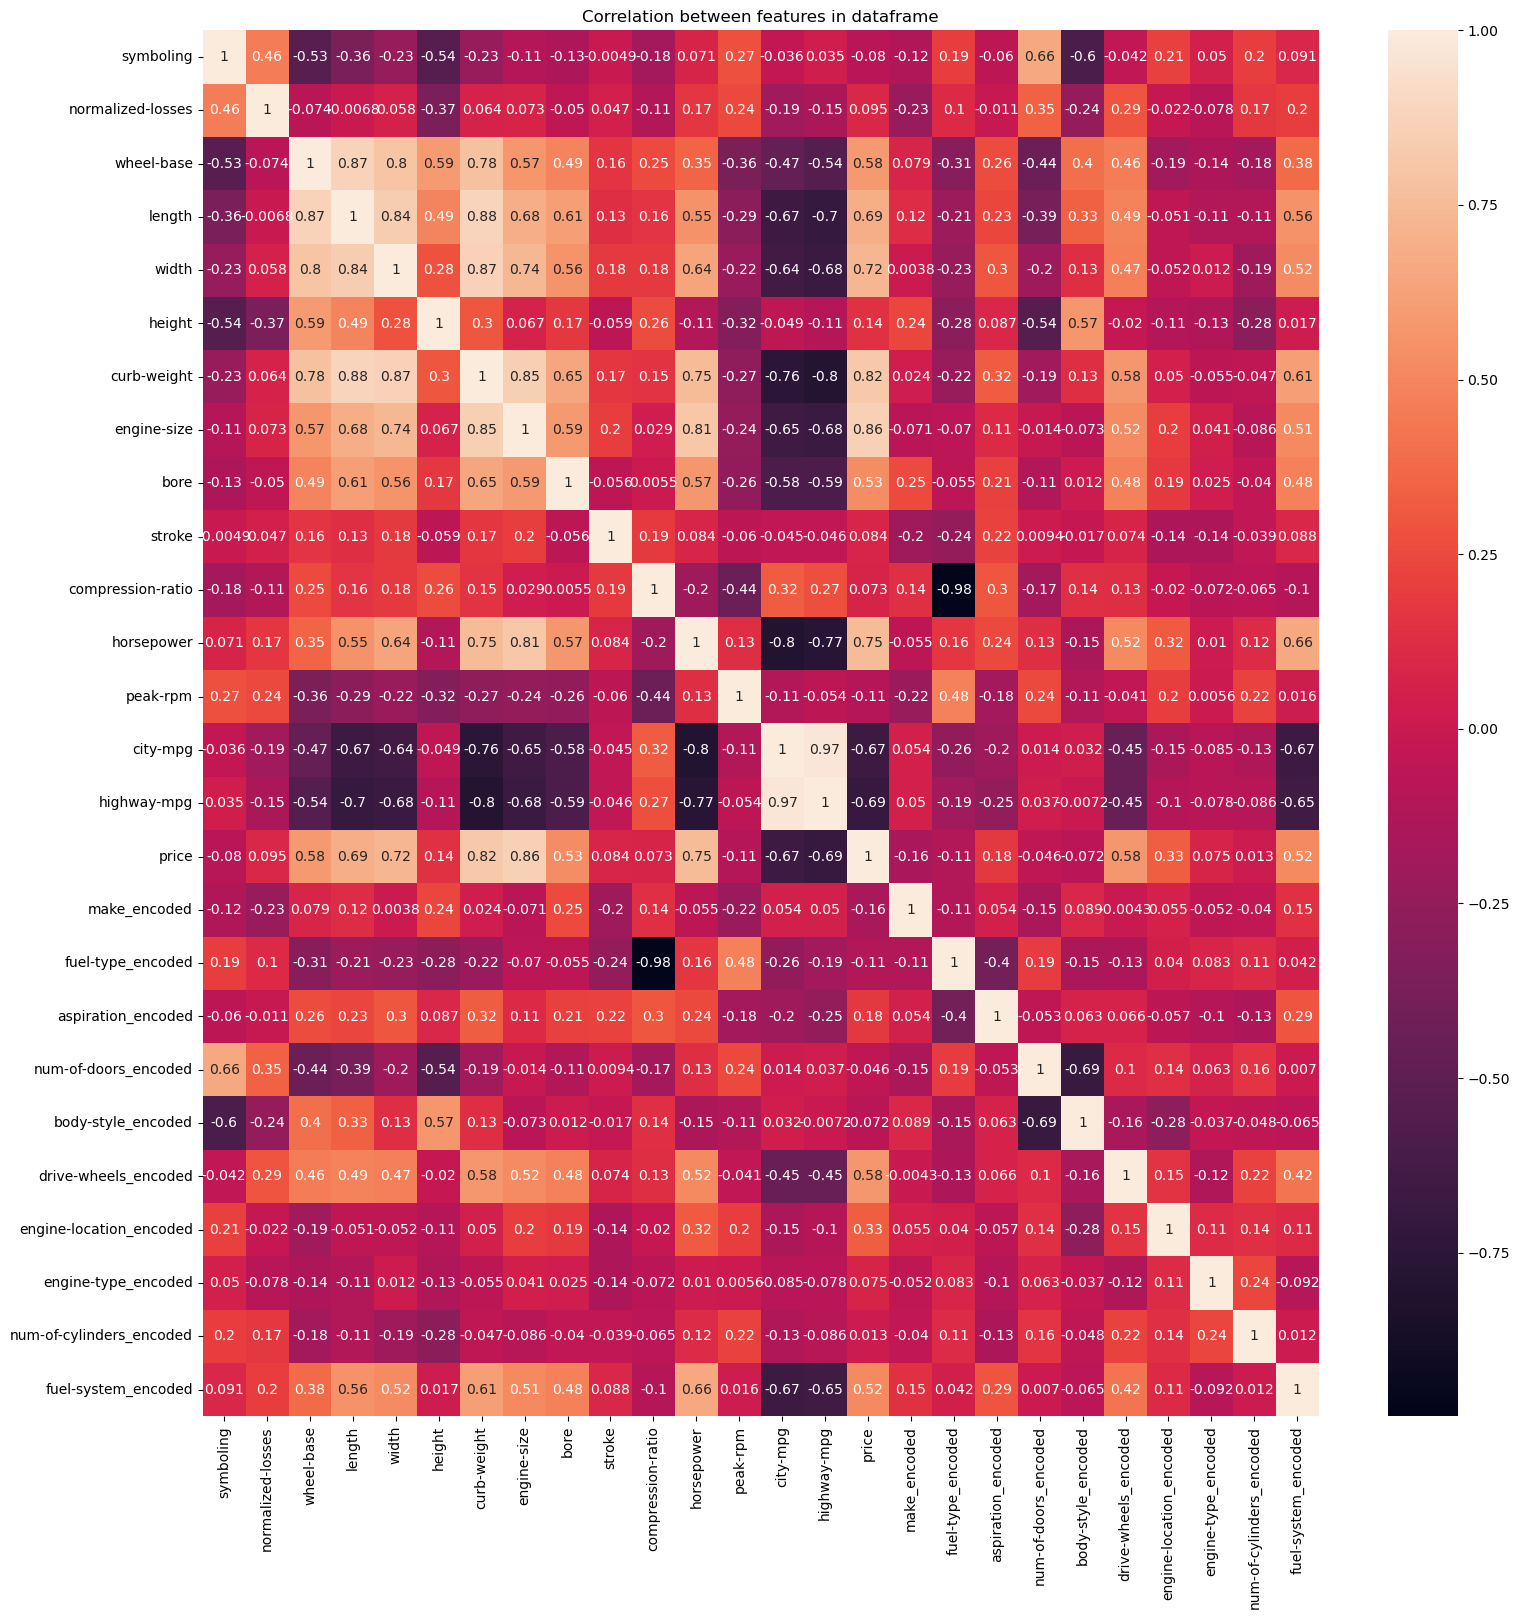

In [84]:
plt.figure(figsize=(18, 18))
sns.heatmap(data=df.corr(), annot=True)
plt.title('Correlation between features in dataframe')
plt.show()

In [13]:
# Converting coorelations of features into a dataframe for better visualization
corr_df = pd.DataFrame({'Columns' : c, 'Correlation' : cor})
corr_df.reset_index

<bound method DataFrame.reset_index of                      Columns  Correlation
0                  symboling    -0.080149
1          normalized-losses     0.095489
2                 wheel-base     0.584847
3                     length     0.686567
4                      width     0.724558
5                     height     0.140439
6                curb-weight     0.819817
7                engine-size     0.860343
8                       bore     0.532861
9                     stroke     0.083627
10         compression-ratio     0.072890
11                horsepower     0.749919
12                  peak-rpm    -0.107283
13                  city-mpg    -0.668822
14               highway-mpg    -0.693037
15                     price     1.000000
16              make_encoded    -0.155259
17         fuel-type_encoded    -0.112439
18        aspiration_encoded     0.175745
19      num-of-doors_encoded    -0.046497
20        body-style_encoded    -0.071614
21      drive-wheels_encoded     0.58

In [14]:
# Sorted the correlations of features for finding best correlated features
sorted_corr_col = corr_df.sort_values(by='Correlation', ascending=False)
sorted_corr_col.drop(15,axis=0,inplace=True)
sorted_corr_col

,Columns,Correlation
7,engine-size,0.860343
6,curb-weight,0.819817
11,horsepower,0.749919
4,width,0.724558
3,length,0.686567
2,wheel-base,0.584847
21,drive-wheels_encoded,0.580367
8,bore,0.532861
22,engine-location_encoded,0.331459
18,aspiration_encoded,0.175745


In [15]:
# Implementing Multiple Linear Regression for prediction 

X = df[['engine-size','curb-weight','horsepower','width']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Multiple Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 15469065.92295922
R-squared: 0.8027996774396371


In [16]:
# Finding MSE and R2 with increasing different features for more accuracy

MSE=[]
R2=[]
N=[]
for i in range(2,26):
    X = df[sorted_corr_col.iloc[0:i]['Columns']]
    # X = df[['engine-size','curb-weight','horsepower','width']]
    y = df['price']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Multiple Linear Regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Model Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(i)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    
    MSE.append(mse)
    R2.append(r2)
    N.append(i)

2
Mean Squared Error: 14949939.279098205
R-squared: 0.809417526385974
3
Mean Squared Error: 15417285.26009637
R-squared: 0.8034597795731336
4
Mean Squared Error: 15469065.92295922
R-squared: 0.8027996774396371
5
Mean Squared Error: 15590360.540319182
R-squared: 0.8012534084026219
6
Mean Squared Error: 15667646.911387686
R-squared: 0.8002681583959225
7
Mean Squared Error: 14298154.306083249
R-squared: 0.8177265094595918
8
Mean Squared Error: 13940697.359889658
R-squared: 0.822283386095963
9
Mean Squared Error: 15343438.212299012
R-squared: 0.8044011849377688
10
Mean Squared Error: 15380090.104539985
R-squared: 0.8039339450275917
11
Mean Squared Error: 15430324.359535871
R-squared: 0.8032935565685791
12
Mean Squared Error: 15544803.688590404
R-squared: 0.8018341691221438
13
Mean Squared Error: 15021207.295905482
R-squared: 0.808508998620133
14
Mean Squared Error: 14828967.102566946
R-squared: 0.8109596849333357
15
Mean Squared Error: 15306328.79614025
R-squared: 0.8048742573826715
16
Mea

In [17]:
# Converting MSE and R2 of features into a dataframe for better visualization
line_df = pd.DataFrame({'No_of_Columns' : N, 'MSE' : MSE, 'R2' : R2})
line_df

,No_of_Columns,MSE,R2
0,2,1.494994e+07,0.809418
1,3,1.541729e+07,0.803460
2,4,1.546907e+07,0.802800
3,5,1.559036e+07,0.801253
4,6,1.566765e+07,0.800268
5,7,1.429815e+07,0.817727
6,8,1.394070e+07,0.822283
7,9,1.534344e+07,0.804401
8,10,1.538009e+07,0.803934
9,11,1.543032e+07,0.803294


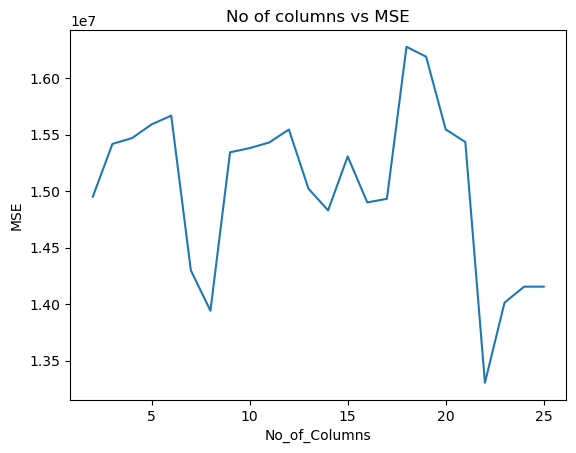

In [18]:
#  Ploting a line plot for visualizing MSE with different no of columns
sns.lineplot(x=line_df['No_of_Columns'], y=line_df['MSE'])
plt.title('No of columns vs MSE')
plt.show()

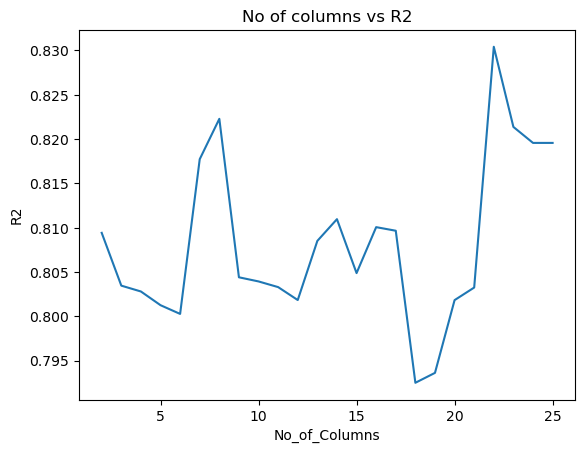

In [19]:
#  Ploting a line plot for visualizing MSE with different no of columns
sns.lineplot(x=line_df['No_of_Columns'], y=line_df['R2'])
plt.title('No of columns vs R2')
plt.show()

In [20]:
# As from ploting we can say R2 is high when we take 8 columns for predicting model so it gives high accuracy

X = df[sorted_corr_col.iloc[0:8]['Columns']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Multiple Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 13940697.359889658
R-squared: 0.822283386095963


In [21]:
# engine-size, curb-weight, horsepower, width, length, wheel-base, drive-wheels_encoded, bore, engine-location_encoded
# Above are the 8 features used for prediction for high accuracy
# Predicting price of car based on features 
X_test=[[152, 2823, 154, 65.5, 171.2, 94.5, 2, 2.68]]
y_pred = model.predict(X_test)
y_pred

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19277.32164785])

<Axes: >

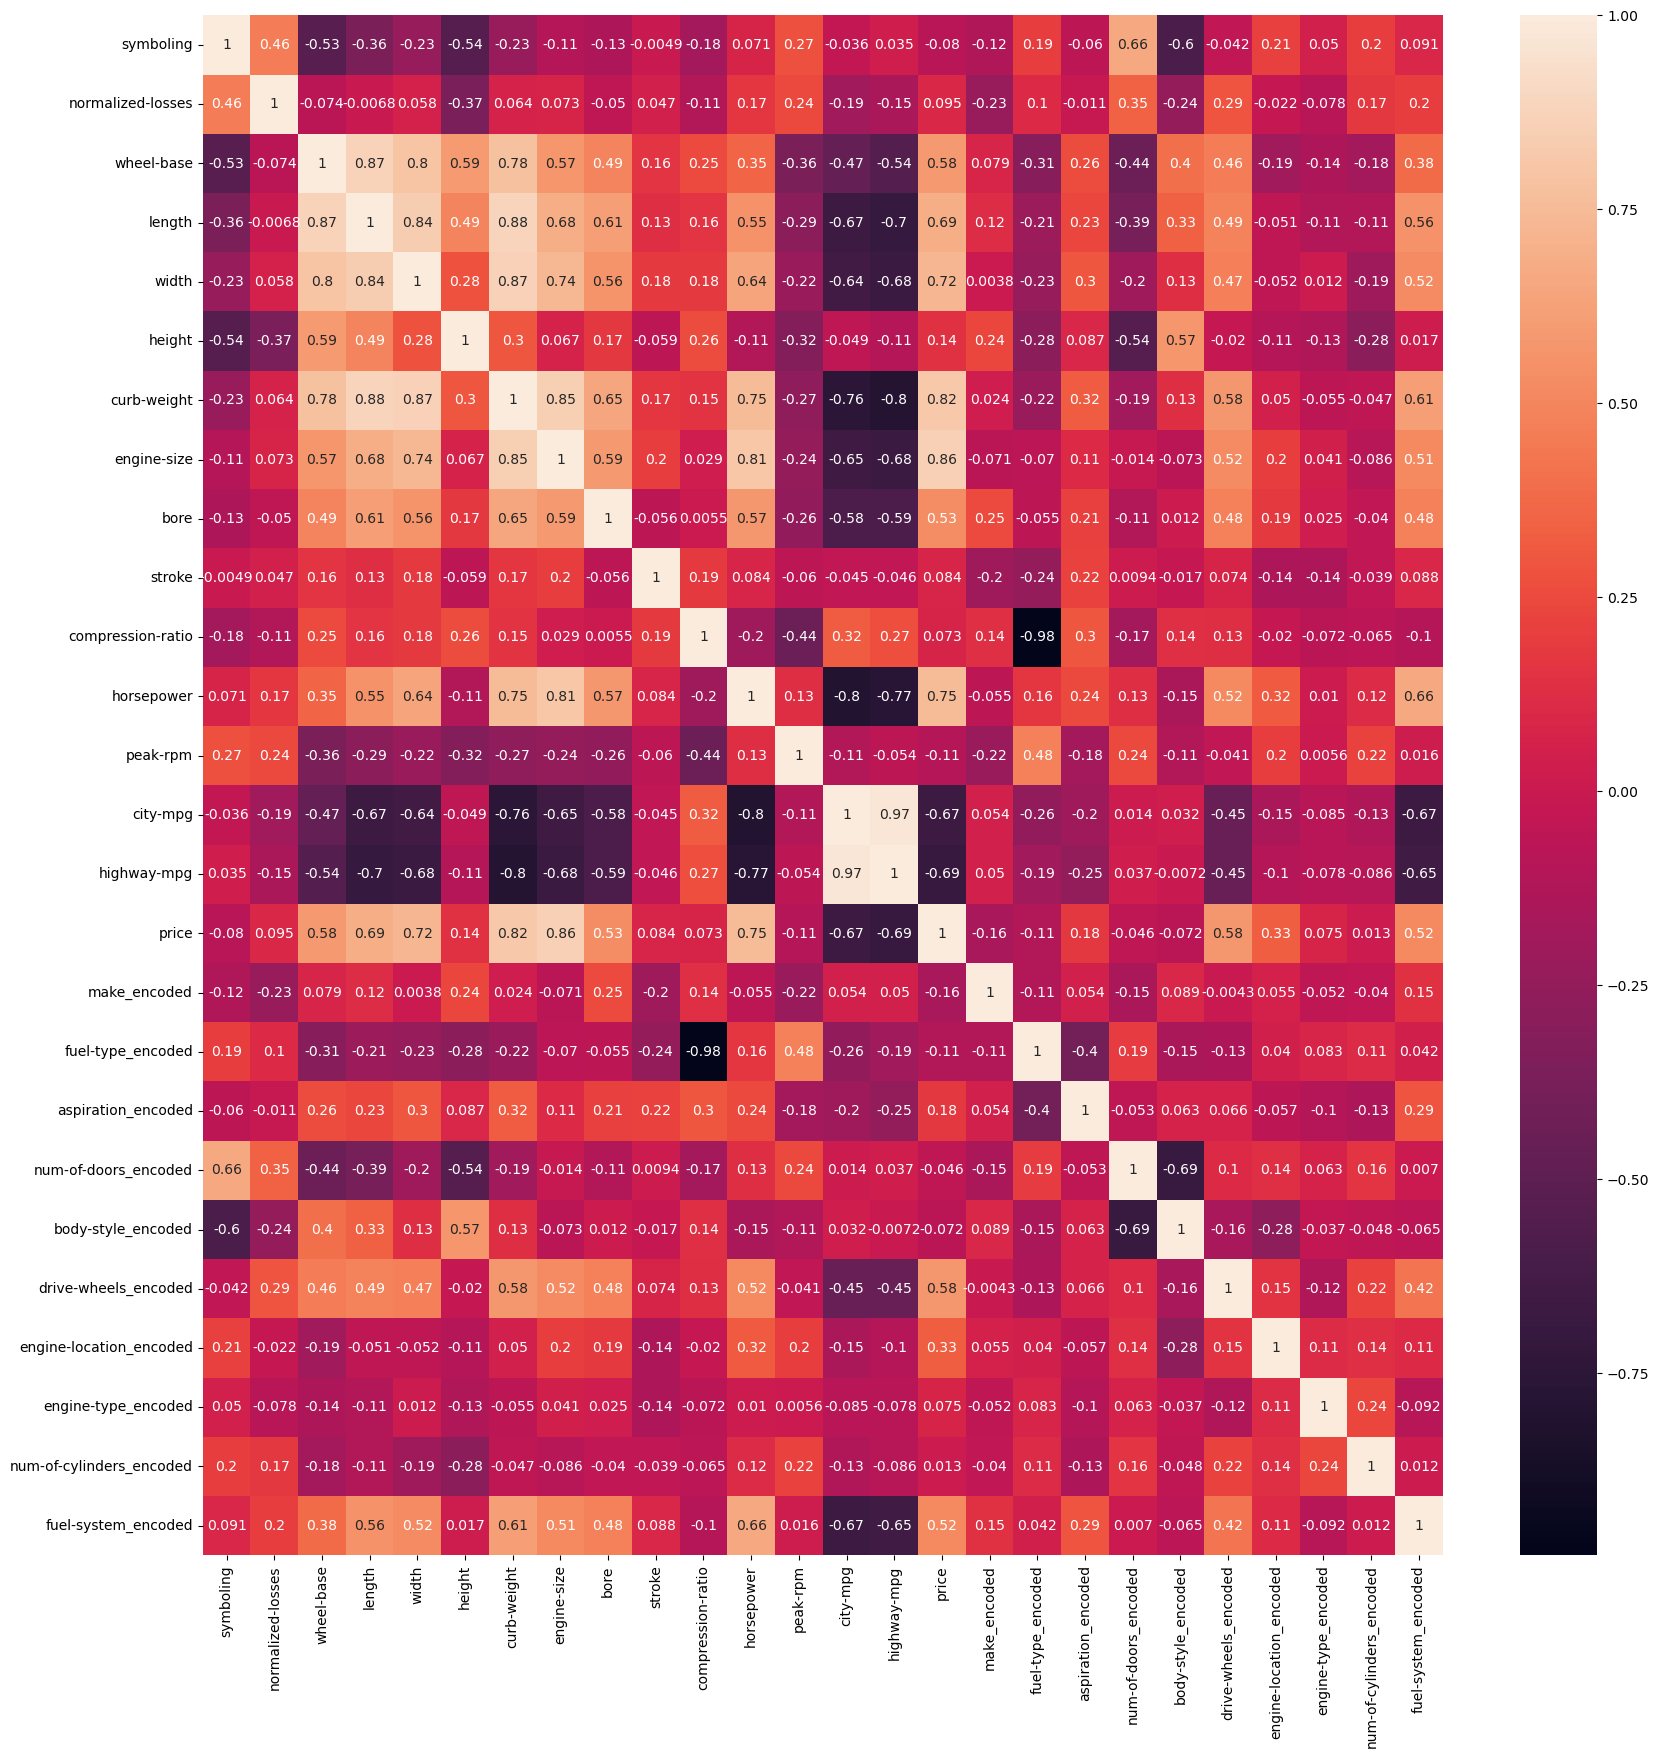